In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/customer_behavior_analytcis.csv')
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [3]:
list(df.columns)

['total_purchases',
 'avg_cart_value',
 'total_time_spent',
 'product_click',
 'discount_counts',
 'customer_id']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [5]:
df.isnull().sum()

,0
total_purchases,20
avg_cart_value,20
total_time_spent,0
product_click,20
discount_counts,0
customer_id,0


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

,0
total_purchases,0
avg_cart_value,0
total_time_spent,0
product_click,0
discount_counts,0
customer_id,0


In [8]:
df.drop(5, inplace=True)

In [9]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,978.000000,978.000000,978.000000,978.000000,978.000000
mean,11.570552,75.331084,49.383088,28.246421,4.310838
std,7.019904,54.952619,32.801952,16.302589,4.516263
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.095000,22.325000,16.000000,1.000000
50%,10.000000,49.370000,40.265000,21.000000,2.000000
75%,17.000000,120.717500,77.305000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

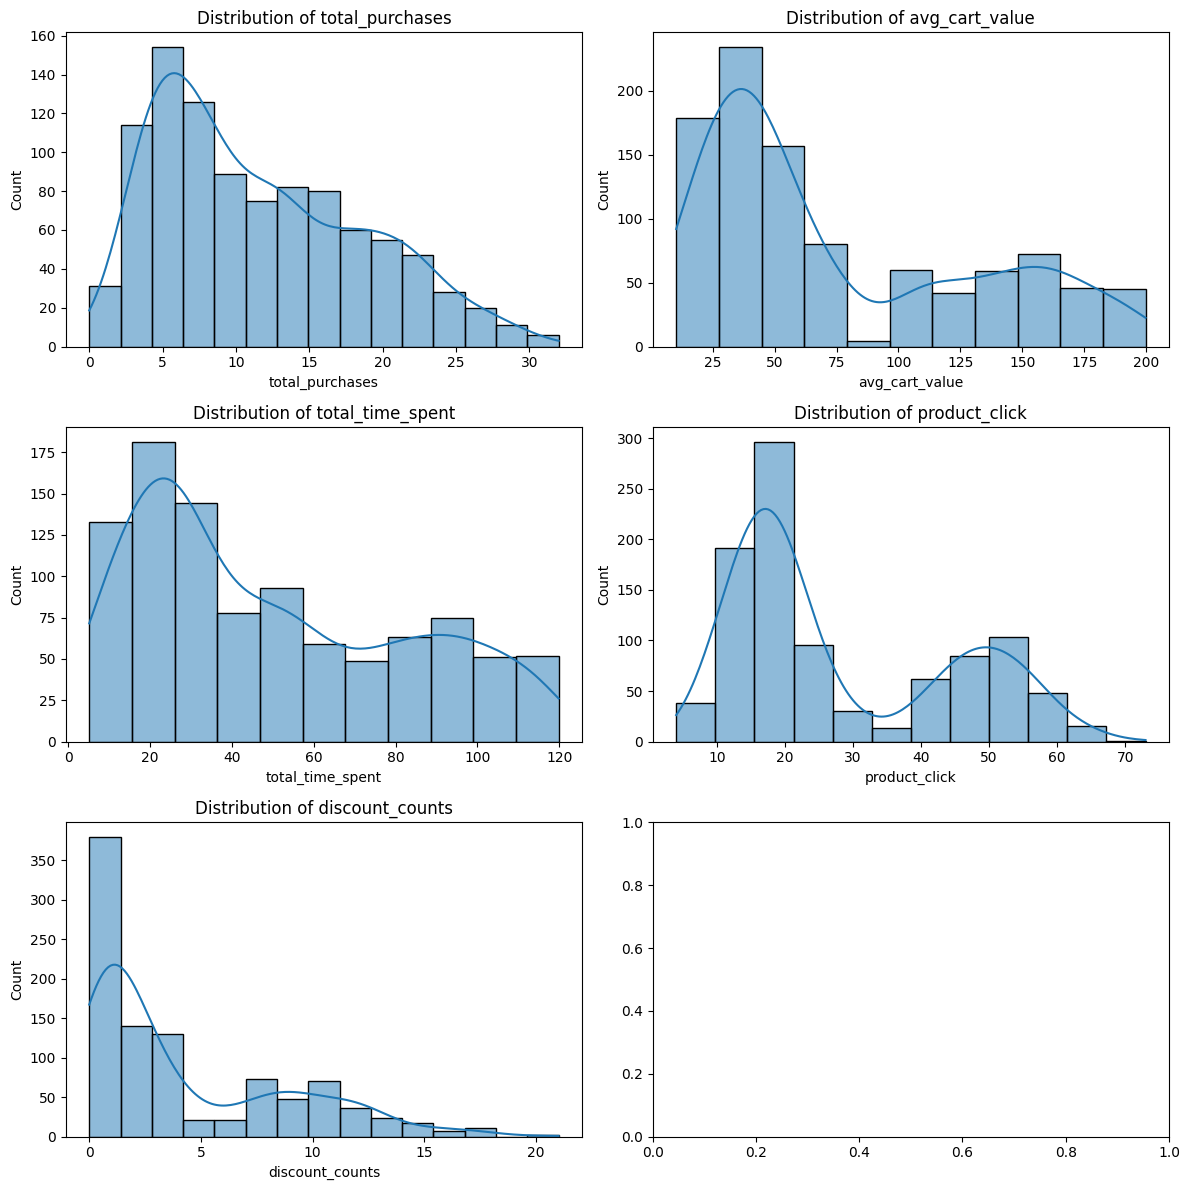

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.histplot(df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [19]:
df_scaled.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,-0.651418,0.983330,0.085005,-0.628837,-0.955003
1,1.486457,-0.931298,-1.225953,-0.812951,0.595744
2,-1.364043,-0.785643,1.259926,1.335046,-0.511932
3,1.914032,-0.882686,-1.164035,-0.751579,1.260350
4,-0.651418,0.912505,-0.463413,0.107619,-0.290397


In [20]:
from sklearn.cluster import KMeans

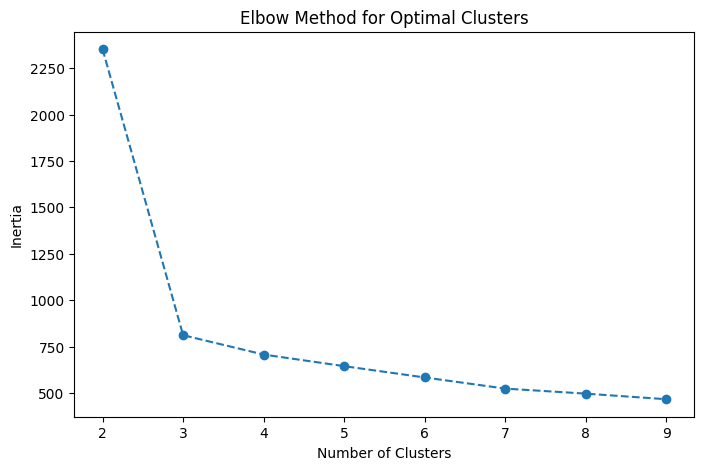

In [21]:
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [22]:
optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [23]:
from sklearn.decomposition import PCA

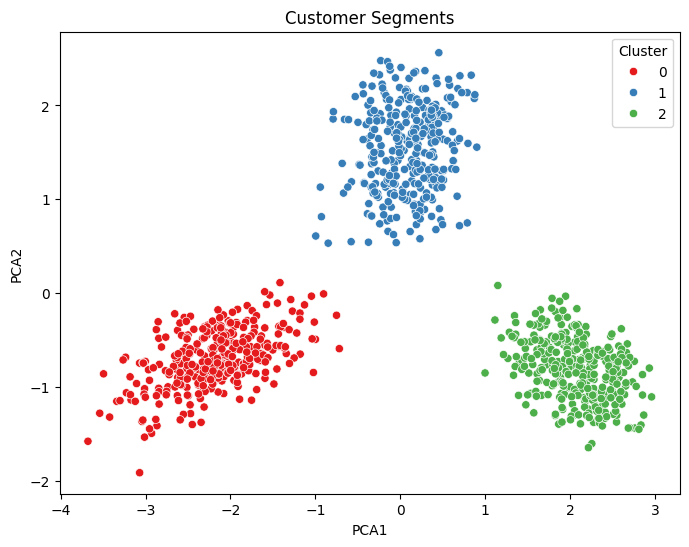

In [27]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
df['PCA1'], df['PCA2'] = reduced_data[:, 0], reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='Set1', data=df)
plt.title('Customer Segments')
plt.show()

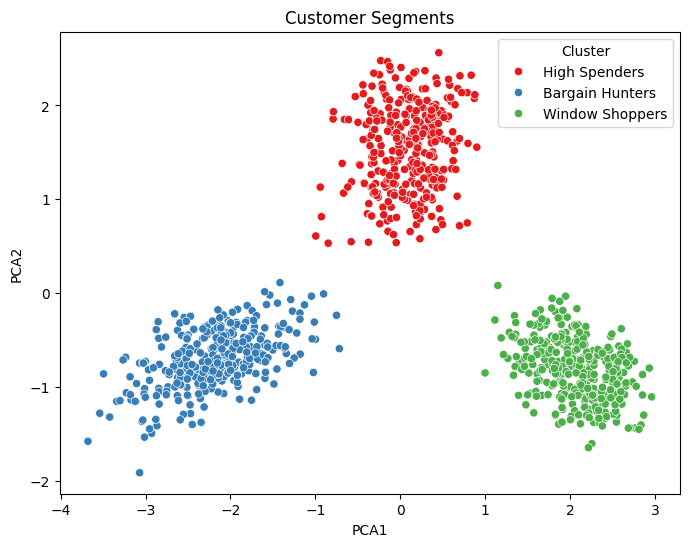

In [29]:
cluster_labels = {0: 'Bargain Hunters', 1: 'High Spenders', 2: 'Window Shoppers'}
df['Cluster'] = df['Cluster'].map(cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='Set1', data=df)
plt.title('Customer Segments')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
sil_score = silhouette_score(df_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.6261026444344858
